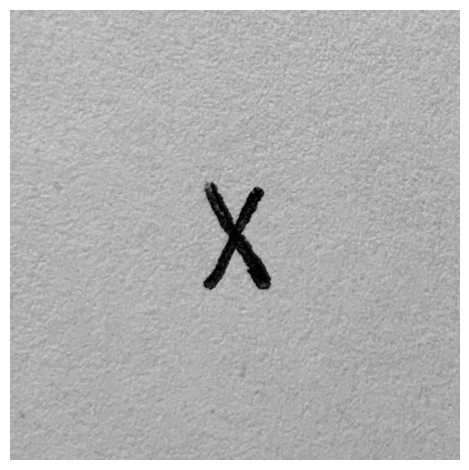

shape: (800, 800)
min: 0.0
max: 0.8976


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_image = mpimg.imread('../images/x.png')
image = np.dot(original_image[..., :3], [0.2989, 0.5870, 0.1140])


plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f'shape: {image.shape}')
print(f'min: {round(image.min(), 4)}')
print(f'max: {round(image.max(), 4)}')

In [2]:
# dividir matriz en sub matrices
def dividir(matrix, n):
    sub_matrices = []
    
    for i in range(0, matrix.shape[0], n):
        for j in range(0, matrix.shape[1], n):
            submatriz = matrix[i:i+n, j:j+n]
            sub_matrices.append(submatriz)
    return sub_matrices

# valor más repetido
def mas_repetido(image, value=None, delta=None):   # value: 'min' | 'max'
    minimo = image.min()
    maximo = image.max()
    
    if value == None:
        valores, conteos = np.unique(image, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif value == 'min':   # min: mas oscuros
        rango_min = minimo + delta
        rango = image[(image >= minimo) & (image <= rango_min)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif value == 'max':   # min: mas claros
        rango_max = maximo - delta
        rango = image[(image <= maximo) & (image >= rango_max)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    
# Detectar si es similar a rep
def rep_to_color(valor, rep, delta):
    if abs(valor - rep) <= delta: return True
    else: return False

# cambiar color mas oscuro y mas repetido (texto) a negro
def toBlack(image, delta1, delta2):
    rep = mas_repetido(image, 'min', delta1)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if rep_to_color(image[i, j], rep, delta2):
                image[i, j] = 0
    return image

# suponiendo que todos los oscuros ya se convirtieron a 0, convertir todo el resto en 1
def toWhite(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] != 0:
                image[i, j] = 1
    return image

# imagenes sin texto transformarlas a blanco
def blank(image):
    if np.all(image == 0):
        image = np.ones(image.shape)
    return image

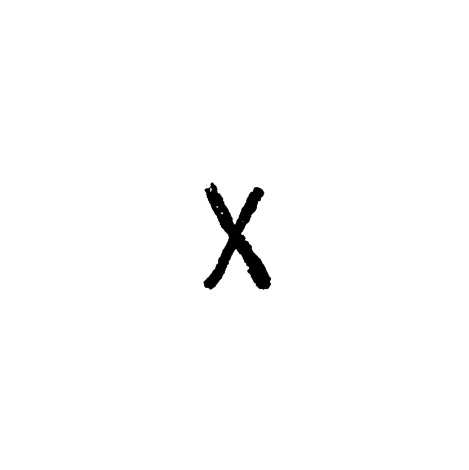

In [3]:
image = toBlack(image, 0.05, 0.3)
image = toWhite(image)

plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# encontrar los límites de la figura
def limits(image):
    # Límite izquierdo
    izq = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] == 0:
                izq.append(j)
                break
    izq = min(izq)
    
    # Límite derecho
    der = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]-1, 0, -1):
            if image[i,j] == 0:
                der.append(j)
                break
    der = max(der)
    
    # Límite superior
    sup = []
    for j in range(image.shape[1]):
        for i in range(image.shape[0]):
            if image[i,j] == 0:
                sup.append(i)
                break
    sup = min(sup)
    
    # Límite inferior
    inf = []
    for j in range(image.shape[1]):
        for i in range(image.shape[0]-1, 0, -1):
            if image[i,j] == 0:
                inf.append(i)
                break
    inf = max(inf)
    
    return izq, der, sup, inf

In [8]:
# recortar la imagen según los límites de la figura
def crop(image, BW=None):   # si se entrega una imagen que no ha sido procesada (blanco y negro) se debe entregar una segunda imagen en blanco y negro
    if BW is None: izq, der, sup, inf = limits(image)
    else: izq, der, sup, inf = limits(BW)
    crop_image = []
    for i in range(sup, inf+1):
        row = []
        for j in range(izq, der+1):
            row.append(image[i,j])
        crop_image.append(row)
    crop_image = np.array(crop_image)
    return crop_image

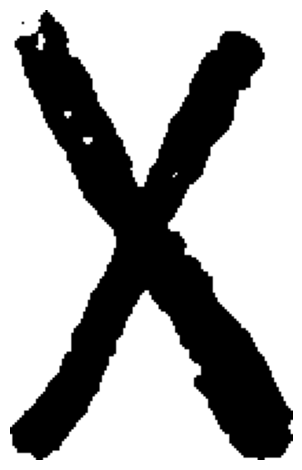

(191, 120)


In [9]:
crop_image = crop(image)
    
plt.imshow(crop_image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()
plt.show()
print(crop_image.shape)